--- Linear Regression Results ---
For every 1% rise in unemployment, property value is expected to change by: €110,728.04


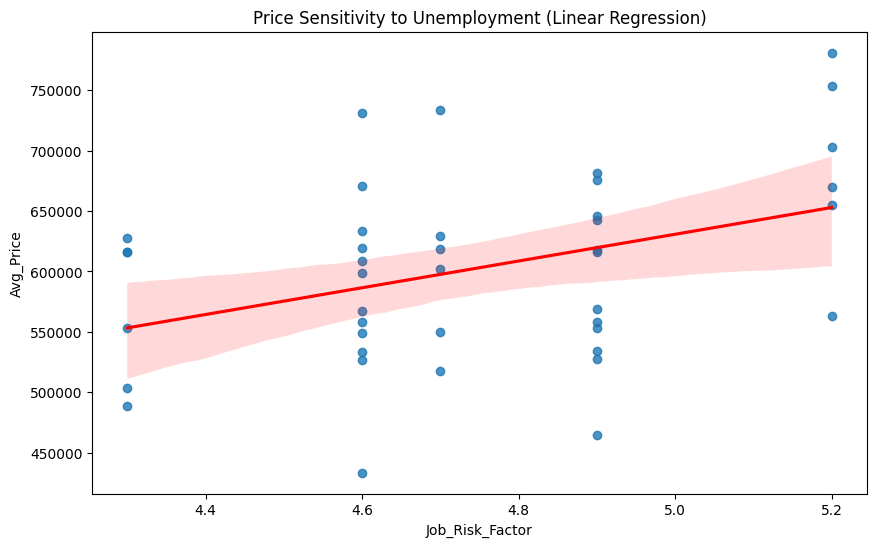

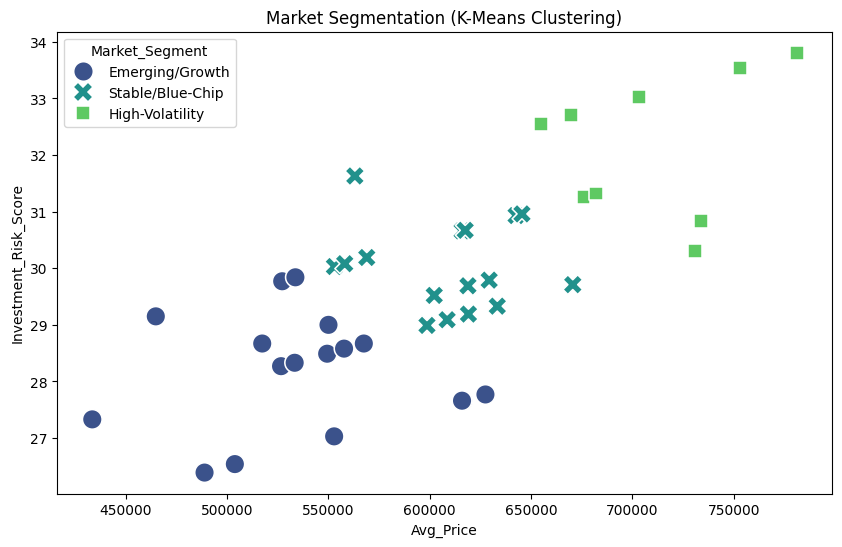

--- Phase 2 Complete ---
Files saved: phase2_linear_regression.png, phase2_market_clusters.png, dublin_advanced_analytics.csv


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Load your results
df = pd.read_csv('dublin_investment_analysis_results.csv')

# --- PART A: LINEAR REGRESSION (Price Sensitivity) ---
# Question: How much does 1% unemployment drop the property value?

# Reshape data for the model
X = df[['Job_Risk_Factor']].values # Independent Variable (Unemployment)
y = df['Avg_Price'].values         # Dependent Variable (Price)

model = LinearRegression()
model.fit(X, y)

# Prediction Logic
unemployment_rise = 1.0
price_drop = model.coef_[0] * unemployment_rise

print(f"--- Linear Regression Results ---")
print(f"For every 1% rise in unemployment, property value is expected to change by: €{price_drop:,.2f}")

# Visualize Regression
plt.figure(figsize=(10, 6))
sns.regplot(x='Job_Risk_Factor', y='Avg_Price', data=df, line_kws={"color": "red"})
plt.title('Price Sensitivity to Unemployment (Linear Regression)')
plt.savefig('phase2_linear_regression.png')
plt.show()



# --- PART B: K-MEANS CLUSTERING (Investor Segments) ---
# Grouping districts based on Price and Risk behavior

# Select features for clustering
features = df[['Avg_Price', 'Investment_Risk_Score']]

# Standardize data (crucial for K-Means)
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

# Apply K-Means (3 Clusters: Safe, Growth, High-Risk)
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
df['Cluster'] = kmeans.fit_predict(scaled_features)

# Rename clusters for business context
cluster_map = {0: 'Stable/Blue-Chip', 1: 'Emerging/Growth', 2: 'High-Volatility'}
df['Market_Segment'] = df['Cluster'].map(cluster_map)

# Visualize Clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Avg_Price', y='Investment_Risk_Score', hue='Market_Segment',
                style='Market_Segment', s=200, data=df, palette='viridis')
plt.title('Market Segmentation (K-Means Clustering)')
plt.savefig('phase2_market_clusters.png')
plt.show()



# Save the advanced results
df.to_csv('dublin_advanced_analytics.csv', index=False)
print("--- Phase 2 Complete ---")
print("Files saved: phase2_linear_regression.png, phase2_market_clusters.png, dublin_advanced_analytics.csv")